# Linear Programming: Geometry, Duality & Sensitivity

## Objective
To understand linear programming through:
- Graphical solution
- Extreme point optimality
- Primal formulation
- Dual formulation
- Sensitivity interpretation

## Problem

Maximize the objective function:

\begin{aligned}
Z = 3x_1 + 5x_2
\end{aligned}

subject to the constraints:

\begin{aligned}
x_1 + 2x_2 &\le 8 \\
3x_1 + 2x_2 &\le 12 \\
x_1, x_2 &\ge 0
\end{aligned}

In [1]:
from pulp import *
from geometry import plot_feasible_region
from corners import evaluate_corners
from primal import solve_primal
from dual import solve_dual
from sensitivity_rhs import rhs_sensitivity
from sensitivity_cost import cost_sensitivity
from interpretation import interpretation_notes

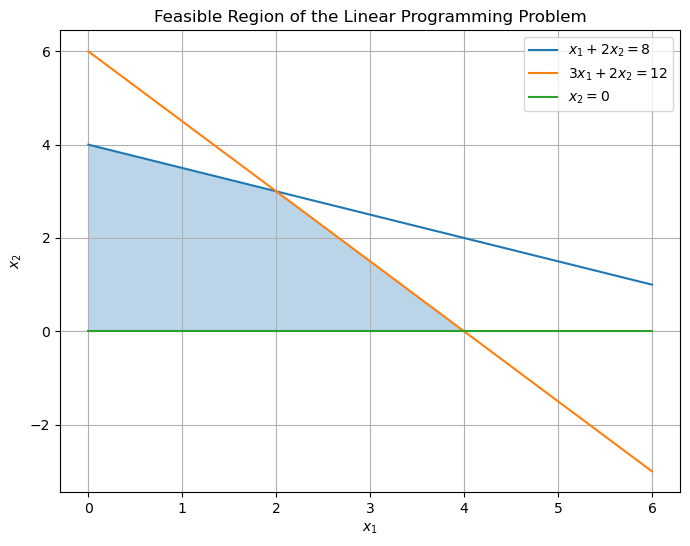

In [2]:
plot_feasible_region()

In [3]:
evaluate_corners()

{'O': {'x1': 0, 'x2': 0, 'Z': 0},
 'A': {'x1': 0, 'x2': 4, 'Z': 20},
 'B': {'x1': 2, 'x2': 3, 'Z': 21},
 'C': {'x1': 4, 'x2': 0, 'Z': 12}}

# Interpretation of Graphical Solution

The feasible region is a convex polygon formed by the intersection
of all constraint half-spaces. By the fundamental theorem of linear
programming, the optimal solution occurs at an extreme point of the
feasible region.

Evaluating the objective function at each corner point shows that
the maximum value is attained at $(x_1, x_2) = (2,3)$ with $Z = 21$.

In [4]:
solve_primal()

{'x1': 2.0,
 'x2': 3.0,
 'Z': 21.0,
 'shadow_prices': {'_C1': 2.25, '_C2': 0.25},
 'reduced_costs': {'x1': -0.0, 'x2': -0.0}}

## Dual Problem

The dual of the primal maximization problem is given by:

\begin{aligned}
\min \; W = 8y_1 + 12y_2
\end{aligned}

subject to:
\begin{aligned}
y_1 + 3y_2 &\ge 3 \\
2y_1 + 2y_2 &\ge 5 \\
y_1, y_2 &\ge 0
\end{aligned}

In [5]:
solve_dual()

{'y1': 2.25, 'y2': 0.25, 'dual_value': 21.0}

## Strong Duality

The optimal value of the primal problem is
\
Z* = 21.

The optimal value of the dual problem is
\
W* = 21.

Since the optimal values of the primal and dual problems are equal,
the strong duality theorem for linear programming is verified.

In [6]:
rhs_sensitivity()

(1.5, 3.75, 23.25)

In [7]:
cost_sensitivity()

(2.0, 3.0, 23.0)

## Sensitivity Analysis

The shadow prices represent the marginal increase in the optimal
objective value corresponding to a unit increase in the right-hand
side of each constraint, within allowable ranges.

A positive shadow price indicates that the corresponding constraint
is binding and that relaxing it would improve the objective value.
Reduced costs indicate how much the objective coefficient of a
non-basic variable must improve for it to enter the optimal basis.

Sensitivity analysis provides valuable insight into the stability
and economic interpretation of the optimal solution.

In [8]:
interpretation_notes()

'\nKey Interpretations:\n- Optimal solutions occur at extreme points due to convexity.\n- Primal and dual optimal values coincide (strong duality).\n- Shadow prices represent marginal value of resources.\n- Reduced costs measure improvement needed to enter the basis.\n- Sensitivity results are local and valid within allowable ranges.\n'